In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import StackingClassifier
from sklearn.impute import SimpleImputer

# Load your dataset for training
file_path = "C:\\Users\\harih\\OneDrive\\Desktop\\AI Final Project\\modelling_table (2).csv"
data = pd.read_csv(file_path)

# Drop unnecessary columns
drop_columns = [
    'Team 1',
    'Team 2',
    'Unnamed: 0',
    'H2H_Home_Total_Wins_Last_4',
    'H2H_Away_Total_Wins_Last_4',
    'H2H_Draws_Last_4',
    'B365H',
    'B365D',
    'B365A'
]
data.drop(columns=drop_columns, inplace=True)

# Define features and target for Win/Draw/Loss
X = data.drop(columns=["Team 1 Score", "Team 2 Score"])
y = np.where(data["Team 1 Score"] > data["Team 2 Score"], 0,   # Team 1 Win
             np.where(data["Team 1 Score"] == data["Team 2 Score"], 1,  # Draw
                      2))  # Team 2 Win

# Handle missing values using SimpleImputer on features only
imputer = SimpleImputer(strategy='mean')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Initialize K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Base models
base_models = [
    ('win_model', LogisticRegression(penalty='l2', C=1.0, solver='liblinear', random_state=42)),
    ('draw_model', LogisticRegression(penalty='l2', C=1.0, solver='liblinear', random_state=42)),
    ('loss_model', LogisticRegression(penalty='l2', C=1.0, solver='liblinear', random_state=42))
]

# Stacking Classifier
meta_model = LogisticRegression(penalty='l2', C=1.0, solver='liblinear', random_state=42)
stacked_model = StackingClassifier(estimators=base_models, final_estimator=meta_model)

# Store results
accuracy_list = []
classification_reports = []

for train_index, test_index in kf.split(X_imputed):
    X_train, X_test = X_imputed.iloc[train_index], X_imputed.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]  # Using y for predictions

    # Standardize features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Train the stacking model
    stacked_model.fit(X_train_scaled, y_train)  # Ensure y_train is 1D

    # Make predictions
    y_pred = stacked_model.predict(X_test_scaled)

    # Calculate accuracy and store results
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_list.append(accuracy)
    classification_reports.append(classification_report(y_test, y_pred, output_dict=True))

# Output average accuracy and classification report
average_accuracy = np.mean(accuracy_list)
print("Average Accuracy:", average_accuracy)

# Print detailed classification reports for each fold
for i, report in enumerate(classification_reports):
    print(f"\nClassification Report for Fold {i + 1}:\n", report)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Average Accuracy: 0.4237553342816501

Classification Report for Fold 1:
 {'0': {'precision': 0.5, 'recall': 0.7647058823529411, 'f1-score': 0.6046511627906976, 'support': 17.0}, '1': {'precision': 0.25, 'recall': 0.125, 'f1-score': 0.16666666666666666, 'support': 8.0}, '2': {'precision': 0.375, 'recall': 0.23076923076923078, 'f1-score': 0.2857142857142857, 'support': 13.0}, 'accuracy': 0.4473684210526316, 'macro avg': {'precision': 0.375, 'recall': 0.3734917043740573, 'f1-score': 0.35234403839055, 'support': 38.0}, 'weighted avg': {'precision': 0.40460526315789475, 'recall': 0.4473684210526316, 'f1-score': 0.4033339161858133, 'support': 38.0}}

Classification Report for Fold 2:
 {'0': {'precision': 0.4074074074074074, 'recall': 0.7857142857142857, 'f1-score': 0.5365853658536586, 'support': 14.0}, '1': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 11.0}, '2': {'precision': 0.45454545454545453, 'recall': 0.38461538461538464, 'f1-score': 0.4166666666666667, 'support': 13.0

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [13]:
# Load your predictions file for new fixtures
predictions_file_path = r"C:\Users\harih\OneDrive\Desktop\AI Final Project\prediction_data (1).csv"
new_fixtures = pd.read_csv(predictions_file_path)

# Make a copy of new_fixtures before dropping team columns
nf_copy = new_fixtures.copy()

# Drop unnecessary columns from new_fixtures
new_fixtures.drop(columns=drop_columns, inplace=True)

# Drop target columns after making a copy
new_fixtures.drop(columns=["Team 1 Score", "Team 2 Score"], inplace=True)

# Handle missing values in new fixtures before dropping target columns (if needed)
# new_fixtures_imputed = pd.DataFrame(imputer.transform(new_fixtures), columns=new_fixtures.columns)

# Standardize features for new fixtures
new_fixtures_scaled = scaler.transform(new_fixtures)

# Make predictions for new fixtures
predictions = stacked_model.predict(new_fixtures_scaled)

# Get probabilities for each outcome
probabilities = stacked_model.predict_proba(new_fixtures_scaled)

# Map predictions to results
prediction_labels = {0: 'Team 1 Wins', 1: 'Draw', 2: 'Team 2 Wins'}
predictions_results = [prediction_labels[pred] for pred in predictions]

# Add predictions and probabilities to the DataFrame
new_fixtures['Predictions'] = predictions_results
new_fixtures['Win Probability'] = probabilities[:, 0]
new_fixtures['Draw Probability'] = probabilities[:, 1]
new_fixtures['Loss Probability'] = probabilities[:, 2]

# Combine the team names from nf_copy with the predictions and probabilities
final_output = nf_copy.copy()
final_output['Predictions'] = predictions_results
final_output['Win Probability'] = probabilities[:, 0]
final_output['Draw Probability'] = probabilities[:, 1]
final_output['Loss Probability'] = probabilities[:, 2]

# Display team names and predictions with probabilities
print(final_output[['Team 1', 'Team 2', 'Predictions', 'Win Probability', 'Draw Probability', 'Loss Probability']])


              Team 1           Team 2  Predictions  Win Probability  \
0           West Ham           Fulham         Draw         0.285991   
1          Brentford  Manchester City  Team 1 Wins         0.486970   
2            Chelsea      Bournemouth  Team 1 Wins         0.484258   
3  Nottingham Forest        Liverpool  Team 2 Wins         0.352497   
4            Everton      Aston Villa  Team 1 Wins         0.378879   
5     Leicester City   Crystal Palace  Team 1 Wins         0.413290   
6      Newcastle Utd           Wolves  Team 2 Wins         0.358665   
7            Arsenal        Tottenham  Team 1 Wins         0.518194   
8       Ipswich Town         Brighton  Team 2 Wins         0.295633   
9     Manchester Utd      Southampton  Team 1 Wins         0.421881   

   Draw Probability  Loss Probability  
0          0.379299          0.334710  
1          0.272429          0.240601  
2          0.247697          0.268045  
3          0.222814          0.424689  
4          0.32335

Ordinal Classification Accuracy for Team 1: 0.5291
Ordinal Classification Accuracy for Team 2: 0.5661


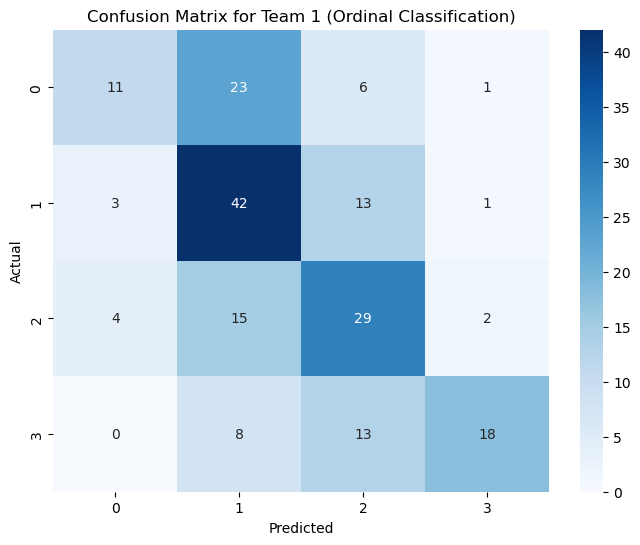

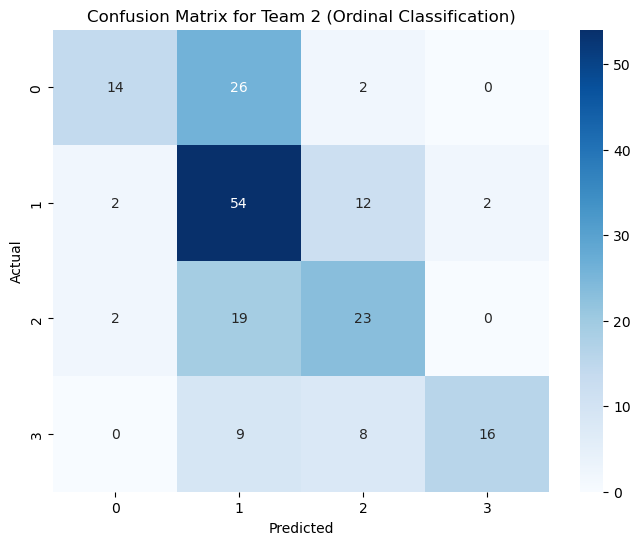

Accuracies of individual base models for Team 1:
Base model 1: 0.8042
Base model 2: 0.7407
Base model 3: 0.8730

Accuracies of individual base models for Team 2:
Base model 1: 0.8360
Base model 2: 0.7460
Base model 3: 0.9048


In [14]:
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

# Load the data
file_path = "C:\\Users\\harih\\OneDrive\\Desktop\\AI Final Project\\modelling_table (2).csv"
data = pd.read_csv(file_path)

# Drop unnecessary columns
data.drop(columns=[
    'Team 1',
    'Team 2',
    'Unnamed: 0',
    'H2H_Home_Total_Wins_Last_4',
    'H2H_Away_Total_Wins_Last_4',
    'H2H_Draws_Last_4',
    'B365H',
    'B365A',
    'B365D'
], inplace=True)

# Handle missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean')
data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

# Define features
X = data_imputed.drop(columns=['Team 1 Score', 'Team 2 Score'])
y_gt_2_team1 = (data_imputed['Team 1 Score'] > 2).astype(int)
y_gt_2_team2 = (data_imputed['Team 2 Score'] > 2).astype(int)

# Standardize the features
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Define ordinal labels for Team 1 and Team 2
def create_ordinal_labels(score):
    if score <= 0:
        return 0
    elif score <= 1:
        return 1
    elif score <= 2:
        return 2
    else:
        return 3

y_team1 = data_imputed['Team 1 Score'].apply(create_ordinal_labels)
y_team2 = data_imputed['Team 2 Score'].apply(create_ordinal_labels)

# Function to train ordinal classifiers
def train_ordinal_classifiers(X, y):
    thresholds = sorted(y.unique())[:-1]  # Exclude the highest class
    classifiers = []
    
    for threshold in thresholds:
        # Create binary labels for the current threshold
        y_binary = (y > threshold).astype(int)
        
        # Train a binary classifier for this threshold
        classifier = LogisticRegression()
        classifier.fit(X, y_binary)
        classifiers.append(classifier)
    
    return classifiers

# Train ordinal classifiers for Team 1 and Team 2
ordinal_classifiers_team1 = train_ordinal_classifiers(X_scaled, y_team1)
ordinal_classifiers_team2 = train_ordinal_classifiers(X_scaled, y_team2)

# Function to predict ordinal classes
def predict_ordinal_classes(classifiers, X):
    probabilities = []
    for classifier in classifiers:
        prob = classifier.predict_proba(X)[:, 1]  # Probability of class > threshold
        probabilities.append(prob)
    
    # Combine probabilities to determine the final ordinal class
    probabilities = np.column_stack(probabilities)
    predictions = (probabilities > 0.5).sum(axis=1)  # Count thresholds exceeded
    return predictions

# Predict ordinal classes for Team 1 and Team 2
predictions_team1 = predict_ordinal_classes(ordinal_classifiers_team1, X_scaled)
predictions_team2 = predict_ordinal_classes(ordinal_classifiers_team2, X_scaled)

# Evaluate the ordinal classifiers
accuracy_team1 = accuracy_score(y_team1, predictions_team1)
accuracy_team2 = accuracy_score(y_team2, predictions_team2)

print(f"Ordinal Classification Accuracy for Team 1: {accuracy_team1:.4f}")
print(f"Ordinal Classification Accuracy for Team 2: {accuracy_team2:.4f}")

# Confusion Matrices
conf_matrix_team1 = confusion_matrix(y_team1, predictions_team1)
conf_matrix_team2 = confusion_matrix(y_team2, predictions_team2)

# Function to plot confusion matrices
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=True, yticklabels=True)
    plt.title(title)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

# Plot Confusion Matrices
plot_confusion_matrix(conf_matrix_team1, "Confusion Matrix for Team 1 (Ordinal Classification)")
plot_confusion_matrix(conf_matrix_team2, "Confusion Matrix for Team 2 (Ordinal Classification)")

# Function to evaluate individual base models
def evaluate_base_models(classifiers, X, y):
    accuracies = []
    for i, classifier in enumerate(classifiers):
        # Create binary labels for the current threshold
        threshold = sorted(y.unique())[i]
        y_binary = (y > threshold).astype(int)
        
        # Predict and compute accuracy
        predictions = classifier.predict(X)
        accuracy = accuracy_score(y_binary, predictions)
        accuracies.append(accuracy)
    return accuracies

# Evaluate individual base models for Team 1 and Team 2
base_accuracies_team1 = evaluate_base_models(ordinal_classifiers_team1, X_scaled, y_team1)
base_accuracies_team2 = evaluate_base_models(ordinal_classifiers_team2, X_scaled, y_team2)

# Display accuracies
print("Accuracies of individual base models for Team 1:")
for i, acc in enumerate(base_accuracies_team1, start=1):
    print(f"Base model {i}: {acc:.4f}")

print("\nAccuracies of individual base models for Team 2:")
for i, acc in enumerate(base_accuracies_team2, start=1):
    print(f"Base model {i}: {acc:.4f}")

In [15]:
# Load the prediction table
prediction_file_path = r"C:\Users\harih\OneDrive\Desktop\AI Final Project\prediction_data (1).csv"
prediction_data = pd.read_csv(prediction_file_path)

# prediction_data = prediction_data.drop(columns = ['Team 1 Score', 'Team 2 Score', 'B365H', 'B365D', 'B365A', 'H2H_Home_Total_Wins_Last_4', 'H2H_Away_Total_Wins_Last_4', 'H2H_Draws_Last_4'])

# Initialize arrays to hold ordinal class predictions for Team 1 and Team 2
ordinal_predictions_team1 = np.zeros((new_fixtures_scaled.shape[0], len(ordinal_classifiers_team1)))
ordinal_predictions_team2 = np.zeros((new_fixtures_scaled.shape[0], len(ordinal_classifiers_team2)))

# Generate ordinal class probabilities for Team 1
for i, model in enumerate(ordinal_classifiers_team1):
    ordinal_predictions_team1[:, i] = model.predict_proba(new_fixtures_scaled)[:, 1]  # Prob of > threshold

# Generate ordinal class probabilities for Team 2
for i, model in enumerate(ordinal_classifiers_team2):
    ordinal_predictions_team2[:, i] = model.predict_proba(new_fixtures_scaled)[:, 1]  # Prob of > threshold

# Combine ordinal probabilities into predictions
final_predictions_team1 = (ordinal_predictions_team1 > 0.5).sum(axis=1)  # Count thresholds exceeded
final_predictions_team2 = (ordinal_predictions_team2 > 0.5).sum(axis=1)  # Count thresholds exceeded

# Add predictions and probabilities back to the original prediction table
prediction_data['Team_1_Ordinal_Prediction'] = final_predictions_team1
prediction_data['Team_2_Ordinal_Prediction'] = final_predictions_team2

# Optional: Add highest ordinal class probability as a confidence score
prediction_data['Confidence_Team_1'] = np.max(ordinal_predictions_team1, axis=1)
prediction_data['Confidence_Team_2'] = np.max(ordinal_predictions_team2, axis=1)

# Display the results for the first 2 fixtures
prediction_results_ordinal = prediction_data[['Team 1', 'Team 2', 'Team_1_Ordinal_Prediction', 
                                              'Confidence_Team_1', 'Team_2_Ordinal_Prediction', 
                                              'Confidence_Team_2']]
print("Ordinal Predictions:")
print(prediction_results_ordinal)  # Display first 2 rows only


Ordinal Predictions:
              Team 1           Team 2  Team_1_Ordinal_Prediction  \
0           West Ham           Fulham                          0   
1          Brentford  Manchester City                          2   
2            Chelsea      Bournemouth                          2   
3  Nottingham Forest        Liverpool                          1   
4            Everton      Aston Villa                          2   
5     Leicester City   Crystal Palace                          1   
6      Newcastle Utd           Wolves                          1   
7            Arsenal        Tottenham                          1   
8       Ipswich Town         Brighton                          1   
9     Manchester Utd      Southampton                          1   

   Confidence_Team_1  Team_2_Ordinal_Prediction  Confidence_Team_2  
0           0.396798                          2           0.886554  
1           0.911839                          3           0.831193  
2           0.962127   

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X d

In [ ]:
# Load the prediction table
prediction_file_path = r"C:\Users\harih\OneDrive\Desktop\AI Final Project\prediction_data (1).csv"
prediction_data = pd.read_csv(prediction_file_path)

prediction_data = prediction_data.drop(columns = ['Team 1 Score', 'Team 2 Score', 'B365H', 'B365D', 'B365A', 'H2H_Home_Total_Wins_Last_4', 'H2H_Away_Total_Wins_Last_4', 'H2H_Draws_Last_4'])

nan_counts = prediction_data.isna().sum()
nan_counts = nan_counts[nan_counts>0]
nan_counts

In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Load your dataset for training
file_path = "C:\\Users\\harih\\OneDrive\\Desktop\\AI Final Project\\modelling_table (2).csv"
data = pd.read_csv(file_path)

# Drop unnecessary columns
drop_columns = [
    'Team 1',
    'Team 2',
    'Unnamed: 0',
    'H2H_Home_Total_Wins_Last_4',
    'H2H_Away_Total_Wins_Last_4',
    'H2H_Draws_Last_4',
    'B365H',
    'B365D',
    'B365A'
]
data.drop(columns=drop_columns, inplace=True)

# Define features and target for Win/Draw/Loss
X = data.drop(columns=["Team 1 Score", "Team 2 Score"])
y = np.where(data["Team 1 Score"] > data["Team 2 Score"], 0,   # Team 1 Win
             np.where(data["Team 1 Score"] == data["Team 2 Score"], 1,  # Draw
                      2))  # Team 2 Win

# Handle missing values using SimpleImputer on features only
imputer = SimpleImputer(strategy='mean')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Initialize K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Base models
win_model = LogisticRegression(penalty='l2', C=1.0, solver='liblinear', random_state=42)
draw_model = LogisticRegression(penalty='l2', C=1.0, solver='liblinear', random_state=42)
loss_model = LogisticRegression(penalty='l2', C=1.0, solver='liblinear', random_state=42)

# Store results
win_accuracy_list = []
draw_accuracy_list = []
loss_accuracy_list = []

for train_index, test_index in kf.split(X_imputed):
    X_train, X_test = X_imputed.iloc[train_index], X_imputed.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]  # Using y for predictions

    # Standardize features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Train and evaluate each model individually
    for model, acc_list, label in zip(
        [win_model, draw_model, loss_model],
        [win_accuracy_list, draw_accuracy_list, loss_accuracy_list],
        [0, 1, 2]
    ):
        y_train_binary = (y_train == label).astype(int)
        y_test_binary = (y_test == label).astype(int)
        
        model.fit(X_train_scaled, y_train_binary)
        y_pred_binary = model.predict(X_test_scaled)
        accuracy = accuracy_score(y_test_binary, y_pred_binary)
        acc_list.append(accuracy)

# Calculate average accuracies
average_win_accuracy = np.mean(win_accuracy_list)
average_draw_accuracy = np.mean(draw_accuracy_list)
average_loss_accuracy = np.mean(loss_accuracy_list)

# Print results
print("Average Accuracy for Win Model:", average_win_accuracy)
print("Average Accuracy for Draw Model:", average_draw_accuracy)
print("Average Accuracy for Loss Model:", average_loss_accuracy)


Average Accuracy for Win Model: 0.6354196301564723
Average Accuracy for Draw Model: 0.6509246088193457
Average Accuracy for Loss Model: 0.6611664295874822


Ordinal Classification Accuracy for Team 1: 1.0000
Ordinal Classification Accuracy for Team 2: 1.0000


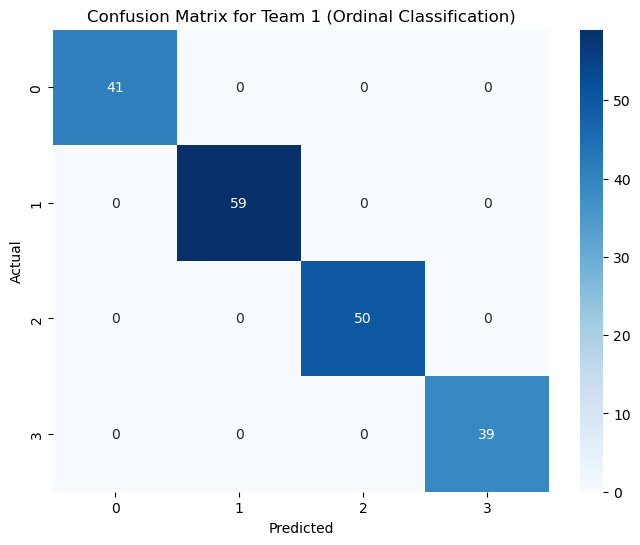

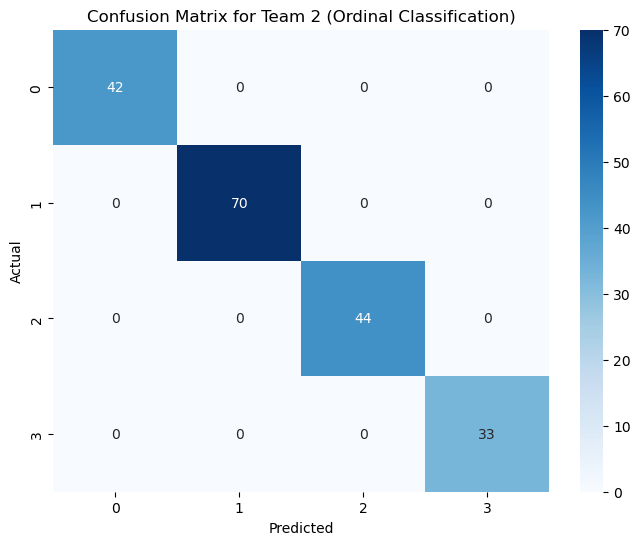

In [17]:
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

# Load the data
file_path = "C:\\Users\\harih\\OneDrive\\Desktop\\AI Final Project\\modelling_table (2).csv"
data = pd.read_csv(file_path)

# Drop unnecessary columns
data.drop(columns=[
    'Team 1',
    'Team 2',
    'Unnamed: 0',
    'H2H_Home_Total_Wins_Last_4',
    'H2H_Away_Total_Wins_Last_4',
    'H2H_Draws_Last_4',
    'B365H',
    'B365D',
    'B365A'
], inplace=True)

# Handle missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean')
data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

# Define features
X = data_imputed.drop(columns=['Team 1 Score', 'Team 2 Score'])
y_gt_2_team1 = (data_imputed['Team 1 Score'] > 2).astype(int)
y_gt_2_team2 = (data_imputed['Team 2 Score'] > 2).astype(int)

# Standardize the features
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Define ordinal labels for Team 1 and Team 2
def create_ordinal_labels(score):
    if score <= 0:
        return 0
    elif score <= 1:
        return 1
    elif score <= 2:
        return 2
    else:
        return 3

y_team1 = data_imputed['Team 1 Score'].apply(create_ordinal_labels)
y_team2 = data_imputed['Team 2 Score'].apply(create_ordinal_labels)

# Function to train ordinal classifiers using RandomForestClassifier
def train_ordinal_classifiers(X, y):
    thresholds = sorted(y.unique())[:-1]  # Exclude the highest class
    classifiers = []
    
    for threshold in thresholds:
        # Create binary labels for the current threshold
        y_binary = (y > threshold).astype(int)
        
        # Train a binary classifier for this threshold
        classifier = RandomForestClassifier(n_estimators=100, random_state=42)
        classifier.fit(X, y_binary)
        classifiers.append(classifier)
    
    return classifiers

# Train ordinal classifiers for Team 1 and Team 2
ordinal_classifiers_team1 = train_ordinal_classifiers(X_scaled, y_team1)
ordinal_classifiers_team2 = train_ordinal_classifiers(X_scaled, y_team2)

# Function to predict ordinal classes using RandomForestClassifier
def predict_ordinal_classes(classifiers, X):
    probabilities = []
    for classifier in classifiers:
        prob = classifier.predict_proba(X)[:, 1]  # Probability of class > threshold
        probabilities.append(prob)
    
    # Combine probabilities to determine the final ordinal class
    probabilities = np.column_stack(probabilities)
    predictions = (probabilities > 0.5).sum(axis=1)  # Count thresholds exceeded
    return predictions

# Predict ordinal classes for Team 1 and Team 2
predictions_team1 = predict_ordinal_classes(ordinal_classifiers_team1, X_scaled)
predictions_team2 = predict_ordinal_classes(ordinal_classifiers_team2, X_scaled)

# Evaluate the ordinal classifiers
accuracy_team1 = accuracy_score(y_team1, predictions_team1)
accuracy_team2 = accuracy_score(y_team2, predictions_team2)

print(f"Ordinal Classification Accuracy for Team 1: {accuracy_team1:.4f}")
print(f"Ordinal Classification Accuracy for Team 2: {accuracy_team2:.4f}")

# Confusion Matrices
conf_matrix_team1 = confusion_matrix(y_team1, predictions_team1)
conf_matrix_team2 = confusion_matrix(y_team2, predictions_team2)

# Function to plot confusion matrices
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=True, yticklabels=True)
    plt.title(title)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

# Plot Confusion Matrices
plot_confusion_matrix(conf_matrix_team1, "Confusion Matrix for Team 1 (Ordinal Classification)")
plot_confusion_matrix(conf_matrix_team2, "Confusion Matrix for Team 2 (Ordinal Classification)")


In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Load your dataset for training
file_path = "C:\\Users\\harih\\OneDrive\\Desktop\\AI Final Project\\modelling_table (2).csv"
data = pd.read_csv(file_path)

# Drop unnecessary columns
drop_columns = [
    'Team 1',
    'Team 2',
    'Unnamed: 0',
    'H2H_Home_Total_Wins_Last_4',
    'H2H_Away_Total_Wins_Last_4',
    'H2H_Draws_Last_4'
]
data.drop(columns=drop_columns, inplace=True)

# Define features and target for Win/Draw/Loss
X = data.drop(columns=["Team 1 Score", "Team 2 Score"])
y = np.where(data["Team 1 Score"] > data["Team 2 Score"], 0,   # Team 1 Win
             np.where(data["Team 1 Score"] == data["Team 2 Score"], 1,  # Draw
                      2))  # Team 2 Win

# Handle missing values using SimpleImputer on features only
imputer = SimpleImputer(strategy='mean')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Initialize K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Base models using RandomForestClassifier
win_model = RandomForestClassifier(n_estimators=100, random_state=42)
draw_model = RandomForestClassifier(n_estimators=100, random_state=42)
loss_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Store results
win_accuracy_list = []
draw_accuracy_list = []
loss_accuracy_list = []

for train_index, test_index in kf.split(X_imputed):
    X_train, X_test = X_imputed.iloc[train_index], X_imputed.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]  # Using y for predictions

    # Standardize features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Train and evaluate each model individually
    for model, acc_list, label in zip(
        [win_model, draw_model, loss_model],
        [win_accuracy_list, draw_accuracy_list, loss_accuracy_list],
        [0, 1, 2]
    ):
        y_train_binary = (y_train == label).astype(int)
        y_test_binary = (y_test == label).astype(int)
        
        model.fit(X_train_scaled, y_train_binary)
        y_pred_binary = model.predict(X_test_scaled)
        accuracy = accuracy_score(y_test_binary, y_pred_binary)
        acc_list.append(accuracy)

# Calculate average accuracies
average_win_accuracy = np.mean(win_accuracy_list)
average_draw_accuracy = np.mean(draw_accuracy_list)
average_loss_accuracy = np.mean(loss_accuracy_list)

# Print results
print("Average Accuracy for Win Model:", average_win_accuracy)
print("Average Accuracy for Draw Model:", average_draw_accuracy)
print("Average Accuracy for Loss Model:", average_loss_accuracy)


Average Accuracy for Win Model: 0.6136557610241822
Average Accuracy for Draw Model: 0.6822190611664296
Average Accuracy for Loss Model: 0.7256045519203413


In [19]:
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np

# Load the data
file_path = "C:\\Users\\harih\\OneDrive\\Desktop\\AI Final Project\\modelling_table (2).csv"
data = pd.read_csv(file_path)

# Drop unnecessary columns
data.drop(columns=[
    'Team 1',
    'Team 2',
    'Unnamed: 0',
    'H2H_Home_Total_Wins_Last_4',
    'H2H_Away_Total_Wins_Last_4',
    'H2H_Draws_Last_4',
    'B365H',
    'B365D',
    'B365A'
], inplace=True)

# Define features
X = data.drop(columns=['Team 1 Score', 'Team 2 Score'])  # Features for both teams

# Standardize the features
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Create binary target variable for both teams scoring
y_both_score = ((data['Team 1 Score'] > 0) & (data['Team 2 Score'] > 0)).astype(int)

# List of targets for Team 1 and Team 2
targets_team1 = [(data['Team 1 Score'] > 0).astype(int)]  # Target for Team 1 scoring >0
targets_team2 = [(data['Team 2 Score'] > 0).astype(int)]  # Target for Team 2 scoring >0

# Initialize base models for Team 1 and Team 2
base_models_team1 = [RandomForestClassifier(n_estimators=100, random_state=42) for _ in targets_team1]
base_models_team2 = [RandomForestClassifier(n_estimators=100, random_state=42) for _ in targets_team2]

# Collect predictions for stacking
stacked_predictions_team1 = np.zeros((X_scaled.shape[0], len(base_models_team1)))
stacked_predictions_team2 = np.zeros((X_scaled.shape[0], len(base_models_team2)))

# K-Fold cross-validation for base models of Team 1
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Train base models for Team 1
for i, (model, y) in enumerate(zip(base_models_team1, targets_team1)):
    fold_predictions = np.zeros(X_scaled.shape[0])  # For storing out-of-fold predictions

    for train_index, test_index in kf.split(X_scaled):
        # Split the data into training and testing sets
        X_train, X_test = X_scaled.iloc[train_index], X_scaled.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Train the base model
        model.fit(X_train, y_train)

        # Store the out-of-fold predictions
        fold_predictions[test_index] = model.predict(X_test)

    # Store predictions for stacking
    stacked_predictions_team1[:, i] = fold_predictions

# K-Fold cross-validation for base models of Team 2
for i, (model, y) in enumerate(zip(base_models_team2, targets_team2)):
    fold_predictions = np.zeros(X_scaled.shape[0])  # For storing out-of-fold predictions

    for train_index, test_index in kf.split(X_scaled):
        # Split the data into training and testing sets
        X_train, X_test = X_scaled.iloc[train_index], X_scaled.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Train the base model
        model.fit(X_train, y_train)

        # Store the out-of-fold predictions
        fold_predictions[test_index] = model.predict(X_test)

    # Store predictions for stacking
    stacked_predictions_team2[:, i] = fold_predictions

# Combine predictions from Team 1 and Team 2 base models for stacking
stacked_predictions = np.hstack((stacked_predictions_team1, stacked_predictions_team2))

# Stacking model to predict if both teams score
meta_model = LogisticRegression()
meta_model.fit(stacked_predictions, y_both_score)

# Predictions with the stacking model
final_predictions = meta_model.predict(stacked_predictions)

# Final model performance
final_accuracy = accuracy_score(y_both_score, final_predictions)
final_conf_matrix = confusion_matrix(y_both_score, final_predictions)

print("Stacking Model Results for Both Teams Scoring:")
print(f"Final Accuracy: {final_accuracy:.4f}")
print("Final Confusion Matrix:")
print(final_conf_matrix)

Stacking Model Results for Both Teams Scoring:
Final Accuracy: 0.6455
Final Confusion Matrix:
[[  7  65]
 [  2 115]]


In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Load your dataset for training
file_path = "C:\\Users\\harih\\OneDrive\\Desktop\\AI Final Project\\modelling_table (2).csv"
data = pd.read_csv(file_path)

# Drop unnecessary columns
drop_columns = [
    'Team 1',
    'Team 2',
    'Unnamed: 0',
    'H2H_Home_Total_Wins_Last_4',
    'H2H_Away_Total_Wins_Last_4',
    'H2H_Draws_Last_4',
    'B365H',
    'B365D',
    'B365A'
]
data.drop(columns=drop_columns, inplace=True)

# Define features and target for Win/Draw/Loss
X = data.drop(columns=["Team 1 Score", "Team 2 Score"])
y = np.where(data["Team 1 Score"] > data["Team 2 Score"], 0,   # Team 1 Win
             np.where(data["Team 1 Score"] == data["Team 2 Score"], 1,  # Draw
                      2))  # Team 2 Win

# Handle missing values using SimpleImputer on features only
imputer = SimpleImputer(strategy='mean')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Initialize K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Base models
base_models = [
    ('win_model', RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)),
    ('draw_model', RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)),
    ('loss_model', RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42))
]

# Stacking Classifier
meta_model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
stacked_model = StackingClassifier(estimators=base_models, final_estimator=meta_model)

# Store results
accuracy_list = []
classification_reports = []

for train_index, test_index in kf.split(X_imputed):
    X_train, X_test = X_imputed.iloc[train_index], X_imputed.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]  # Using y for predictions

    # Standardize features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Train the stacking model
    stacked_model.fit(X_train_scaled, y_train)  # Ensure y_train is 1D

    # Make predictions
    y_pred = stacked_model.predict(X_test_scaled)

    # Calculate accuracy and store results
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_list.append(accuracy)
    classification_reports.append(classification_report(y_test, y_pred, output_dict=True))

# Output average accuracy and classification report
average_accuracy = np.mean(accuracy_list)
print("Average Accuracy:", average_accuracy)

# Print detailed classification reports for each fold
for i, report in enumerate(classification_reports):
    print(f"\nClassification Report for Fold {i + 1}:\n", report)


Average Accuracy: 0.4499288762446657

Classification Report for Fold 1:
 {'0': {'precision': 0.6818181818181818, 'recall': 0.8823529411764706, 'f1-score': 0.7692307692307693, 'support': 17.0}, '1': {'precision': 0.3, 'recall': 0.375, 'f1-score': 0.3333333333333333, 'support': 8.0}, '2': {'precision': 0.6666666666666666, 'recall': 0.3076923076923077, 'f1-score': 0.42105263157894735, 'support': 13.0}, 'accuracy': 0.5789473684210527, 'macro avg': {'precision': 0.5494949494949495, 'recall': 0.5216817496229261, 'f1-score': 0.50787224471435, 'support': 38.0}, 'weighted avg': {'precision': 0.5962519936204146, 'recall': 0.5789473684210527, 'f1-score': 0.5583493145820015, 'support': 38.0}}

Classification Report for Fold 2:
 {'0': {'precision': 0.5882352941176471, 'recall': 0.7142857142857143, 'f1-score': 0.6451612903225806, 'support': 14.0}, '1': {'precision': 0.4166666666666667, 'recall': 0.45454545454545453, 'f1-score': 0.43478260869565216, 'support': 11.0}, '2': {'precision': 0.555555555555

In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA

# Load your dataset
file_path = "C:\\Users\\harih\\OneDrive\\Desktop\\AI Final Project\\modelling_table (2).csv"
data = pd.read_csv(file_path)

# Drop unnecessary columns
drop_columns = [
    'Team 1', 'Team 2', 'Unnamed: 0', 
    'H2H_Home_Total_Wins_Last_4', 'H2H_Away_Total_Wins_Last_4', 'H2H_Draws_Last_4'
]
data.drop(columns=drop_columns, inplace=True)

# Define features and target for Win/Draw/Loss
X = data.drop(columns=["Team 1 Score", "Team 2 Score"])
y = np.where(data["Team 1 Score"] > data["Team 2 Score"], 0,  # Team 1 Win
             np.where(data["Team 1 Score"] == data["Team 2 Score"], 1,  # Draw
                      2))  # Team 2 Win

# Handle missing values
imputer = SimpleImputer(strategy='mean')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Apply PCA for dimensionality reduction
n_components = 10  # Number of PCA components (adjust based on dataset)
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)

# Print explained variance for the chosen number of components
explained_variance = np.sum(pca.explained_variance_ratio_)
print(f"Explained Variance with {n_components} components: {explained_variance:.2f}")

# Initialize K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Base models for stacking
base_models = [
    ('win_model', RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)),
    ('draw_model', RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)),
    ('loss_model', RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42))
]

# Meta model for stacking
meta_model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
stacked_model = StackingClassifier(estimators=base_models, final_estimator=meta_model)

# Store results
accuracy_list = []
classification_reports = []

# Cross-validation loop
for train_index, test_index in kf.split(X_pca):
    X_train, X_test = X_pca[train_index], X_pca[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Train the stacking model
    stacked_model.fit(X_train, y_train)

    # Make predictions
    y_pred = stacked_model.predict(X_test)

    # Calculate accuracy and store results
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_list.append(accuracy)
    classification_reports.append(classification_report(y_test, y_pred, output_dict=True))

# Output average accuracy and classification report
average_accuracy = np.mean(accuracy_list)
print(f"\nAverage Accuracy: {average_accuracy:.2f}")

# Print detailed classification reports for each fold
for i, report in enumerate(classification_reports):
    print(f"\nClassification Report for Fold {i + 1}:\n", report)


Explained Variance with 10 components: 0.80

Average Accuracy: 0.32

Classification Report for Fold 1:
 {'0': {'precision': 0.5, 'recall': 0.5882352941176471, 'f1-score': 0.5405405405405406, 'support': 17.0}, '1': {'precision': 0.2727272727272727, 'recall': 0.375, 'f1-score': 0.3157894736842105, 'support': 8.0}, '2': {'precision': 0.2857142857142857, 'recall': 0.15384615384615385, 'f1-score': 0.2, 'support': 13.0}, 'accuracy': 0.39473684210526316, 'macro avg': {'precision': 0.35281385281385286, 'recall': 0.3723604826546003, 'f1-score': 0.3521100047415837, 'support': 38.0}, 'weighted avg': {'precision': 0.37884483937115515, 'recall': 0.39473684210526316, 'f1-score': 0.3767238152279704, 'support': 38.0}}

Classification Report for Fold 2:
 {'0': {'precision': 0.3333333333333333, 'recall': 0.2857142857142857, 'f1-score': 0.3076923076923077, 'support': 14.0}, '1': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 11.0}, '2': {'precision': 0.3333333333333333, 'recall': 0.5384615

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer

# Load the data
file_path = "C:\\Users\\harih\\OneDrive\\Desktop\\AI Final Project\\modelling_table (2).csv"
data = pd.read_csv(file_path)

# Drop unnecessary columns
data.drop(columns=['Team 1', 'Team 2', 'Unnamed: 0', 'H2H_Home_Total_Wins_Last_4', 
                   'H2H_Away_Total_Wins_Last_4', 'H2H_Draws_Last_4'], inplace=True)

# Handle missing values
imputer = SimpleImputer(strategy='mean')
data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

# Standardize features
X = data_imputed.drop(columns=['Team 1 Score', 'Team 2 Score'])
y_team1_score = data_imputed['Team 1 Score']
y_team2_score = data_imputed['Team 2 Score']
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# 1. Win/Draw/Loss Model
def create_wdl_labels(score_team1, score_team2):
    if score_team1 > score_team2:
        return 1  # Win
    elif score_team1 < score_team2:
        return -1  # Loss
    else:
        return 0  # Draw

y_wdl = data_imputed.apply(lambda row: create_wdl_labels(row['Team 1 Score'], row['Team 2 Score']), axis=1)

# Train WDL model
wdl_model = LogisticRegression(multi_class='multinomial', max_iter=200)
wdl_model.fit(X_scaled, y_wdl)
wdl_probs = wdl_model.predict_proba(X_scaled)

# Compute "safest" WDL bets
wdl_safest_bets = np.abs(wdl_probs[:, 1] - wdl_probs[:, 2])  # Difference between win and loss probabilities

# 2. Over/Under 2.5 Goals
y_over_under_team1 = (y_team1_score > 2).astype(int)
y_over_under_team2 = (y_team2_score > 2).astype(int)

ou_model_team1 = LogisticRegression()
ou_model_team2 = LogisticRegression()
ou_model_team1.fit(X_scaled, y_over_under_team1)
ou_model_team2.fit(X_scaled, y_over_under_team2)

ou_probs_team1 = ou_model_team1.predict_proba(X_scaled)[:, 1]
ou_probs_team2 = ou_model_team2.predict_proba(X_scaled)[:, 1]

# Combine over/under probabilities
ou_combined_probs = (ou_probs_team1 + ou_probs_team2) / 2

# 3. Both Teams to Score (BTTS)
y_btts = ((y_team1_score > 0) & (y_team2_score > 0)).astype(int)

# Stacking model for BTTS
kf = KFold(n_splits=5, shuffle=True, random_state=42)
btts_base_model = RandomForestClassifier(n_estimators=100, random_state=42)
btts_predictions = np.zeros(X_scaled.shape[0])

for train_idx, test_idx in kf.split(X_scaled):
    X_train, X_test = X_scaled.iloc[train_idx], X_scaled.iloc[test_idx]
    y_train, y_test = y_btts.iloc[train_idx], y_btts.iloc[test_idx]
    btts_base_model.fit(X_train, y_train)
    btts_predictions[test_idx] = btts_base_model.predict_proba(X_test)[:, 1]

# Final stacking model
meta_model = LogisticRegression()
meta_model.fit(btts_predictions.reshape(-1, 1), y_btts)
btts_probs = meta_model.predict_proba(btts_predictions.reshape(-1, 1))[:, 1]

# Combine results into tables
results = pd.DataFrame({
    'Fixture': range(len(data_imputed)),  # Placeholder for fixtures
    'Win_Prob': wdl_probs[:, 1],
    'Loss_Prob': wdl_probs[:, 2],
    'Draw_Prob': wdl_probs[:, 0],
    'WDL_Safest_Bet': wdl_safest_bets,
    'OU_Prob': ou_combined_probs,
    'BTTS_Prob': btts_probs
})

# Sort tables
wdl_table = results.sort_values(by='WDL_Safest_Bet', ascending=False)
ou_table = results.sort_values(by='OU_Prob', ascending=False)
btts_table = results.sort_values(by='BTTS_Prob', ascending=False)

# Save or display tables
wdl_table.to_csv("wdl_table.csv", index=False)
ou_table.to_csv("ou_table.csv", index=False)
btts_table.to_csv("btts_table.csv", index=False)

print("Tables created and saved as CSV files.")


Binary Classification Accuracy for Over/Under 2.5 Goals: 0.7407


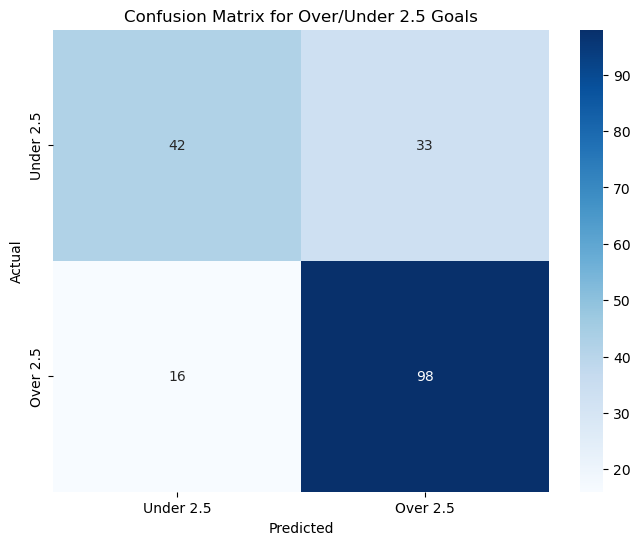

In [21]:
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

# Load the data
file_path = "C:\\Users\\harih\\OneDrive\\Desktop\\AI Final Project\\modelling_table (2).csv"
data = pd.read_csv(file_path)

# Drop unnecessary columns
data.drop(columns=[
    'Team 1',
    'Team 2',
    'Unnamed: 0',
    'H2H_Home_Total_Wins_Last_4',
    'H2H_Away_Total_Wins_Last_4',
    'H2H_Draws_Last_4',
    'B365H',
    'B365D',
    'B365A'
], inplace=True)

# Handle missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean')
data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

# Define features
X = data_imputed.drop(columns=['Team 1 Score', 'Team 2 Score'])
y_total_score = data_imputed['Team 1 Score'] + data_imputed['Team 2 Score']

# Create binary target variable for over/under 2.5 goals
y_over_under = (y_total_score > 2.5).astype(int)

# Standardize the features
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Train a binary classifier
classifier = LogisticRegression()
classifier.fit(X_scaled, y_over_under)

# Predict and evaluate the classifier
predictions = classifier.predict(X_scaled)
accuracy = accuracy_score(y_over_under, predictions)

print(f"Binary Classification Accuracy for Over/Under 2.5 Goals: {accuracy:.4f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_over_under, predictions)

# Function to plot confusion matrix
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Under 2.5', 'Over 2.5'], yticklabels=['Under 2.5', 'Over 2.5'])
    plt.title(title)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

# Plot Confusion Matrix
plot_confusion_matrix(conf_matrix, "Confusion Matrix for Over/Under 2.5 Goals")
